In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import os
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from time import time

# Data overview

In [ ]:
DATA_PATH='data/mushrooms.csv'

In [ ]:
df=pd.read_csv(DATA_PATH)
df.sample(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
834,e,x,y,y,t,l,f,c,b,p,e,r,s,y,w,w,p,w,o,p,n,y,p
4495,p,f,f,y,f,f,f,c,b,h,e,b,k,k,p,b,p,w,o,l,h,y,p
3539,p,x,f,g,f,f,f,c,b,g,e,b,k,k,p,n,p,w,o,l,h,y,d
602,e,f,f,w,f,n,f,w,b,k,t,e,f,f,w,w,p,w,o,e,n,a,g
3267,e,f,y,n,t,n,f,c,b,p,t,b,s,s,p,w,p,w,o,p,n,v,d
4237,p,f,f,y,f,f,f,c,b,h,e,b,k,k,b,n,p,w,o,l,h,v,d
3863,e,x,y,g,t,n,f,c,b,u,t,b,s,s,g,p,p,w,o,p,n,y,d
3138,p,x,f,y,f,f,f,c,b,g,e,b,k,k,n,n,p,w,o,l,h,v,p
783,e,x,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m
7856,p,k,s,e,f,y,f,c,n,b,t,?,k,s,w,p,p,w,o,e,w,v,p


In [ ]:
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(8124, 23)

veil-type has constant value 'p', so we will remove it

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
report = pp.ProfileReport(df)

report.to_notebook_iframe()

# Data processing

In [ ]:
# drop columns contain single unique values: veil-type
df.drop('veil-type', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
indicator_df=pd.get_dummies(df, sparse=True, dtype=np.float32)
print(indicator_df.shape)
indicator_df.sample(10)

(8124, 118)


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
2315,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2355,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7017,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5602,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5040,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7959,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [ ]:
np_data=indicator_df.to_numpy()
X=np_data[:, 2:]
Y=np_data[:, 1]
print(X.shape, Y.shape)
print(Y)

(8124, 116) (8124,)
[1. 0. 0. ... 0. 1. 0.]


In [ ]:
# train test split: 30% for testing
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.4, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4874, 116) (4874,) (3250, 116) (3250,)


# Training decision tree classifier

## Training a simple decision tree with depth=3

In [ ]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9593846153846154

## Visualize trained decision tree

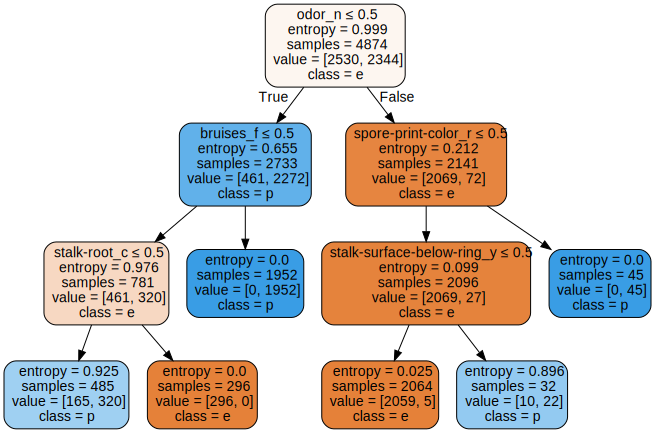

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
FEATURES=list(indicator_df.columns)[2:]
dot_data = export_graphviz(clf, out_file=None, feature_names= FEATURES,
                                class_names=['e', 'p'],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Grid search to find best hyper parameters

In [ ]:
params={
    'criterion': ('gini', 'entropy'),
    'max_depth':(3, 5, 7, 9, 11),
    'min_samples_leaf': (3, 5, 10, 20)
}

In [ ]:
def grid_search(pipeline, parameters, x_train, y_train):
    # find the best parameters for both the feature extraction and the classifier
    grid_searcher = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1,  verbose=10 )
    print("Performing grid search...")
    print("parameters:")
    print(parameters)
    t0 = time()
    grid_searcher.fit(x_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print("Best score: %0.3f" % grid_searcher.best_score_)
    print("Best parameters set:")
    best_estimator=grid_searcher.best_estimator_
    best_parameters = best_estimator.get_params()
    print(best_parameters)
    cv_results=pd.DataFrame(grid_searcher.cv_results_).sort_values(by='rank_test_score')
    return cv_results, best_estimator

In [ ]:
clf=DecisionTreeClassifier()
cv_results, best_tree=grid_search(clf, params, x_train, y_train)

Performing grid search...
parameters:
{'criterion': ('gini', 'entropy'), 'max_depth': (3, 5, 7, 9, 11), 'min_samples_leaf': (3, 5, 10, 20)}
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1101s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0713s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1790s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s


done in 0.908s
Best score: 0.999
Best parameters set:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.9s finished


In [ ]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
28,0.022065,0.004621,0.001635,0.000054,entropy,7,3,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",1.000000,1.000000,0.998153,0.999384,0.000871,1
24,0.019822,0.000275,0.001380,0.000049,entropy,5,3,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.000000,1.000000,0.998153,0.999384,0.000871,1
16,0.024106,0.002277,0.001541,0.000082,gini,11,3,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",1.000000,1.000000,0.998153,0.999384,0.000871,1
32,0.019216,0.000110,0.001586,0.000007,entropy,9,3,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",1.000000,1.000000,0.998153,0.999384,0.000871,1
12,0.026659,0.004810,0.001499,0.000182,gini,9,3,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",1.000000,1.000000,0.998153,0.999384,0.000871,1
8,0.026221,0.002429,0.001543,0.000046,gini,7,3,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",1.000000,1.000000,0.998153,0.999384,0.000871,1
33,0.019312,0.000151,0.001542,0.000030,entropy,9,5,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",1.000000,0.998769,0.998153,0.998974,0.000768,7
25,0.019198,0.000505,0.001516,0.000018,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.000000,0.998769,0.998153,0.998974,0.000768,7
37,0.019002,0.000473,0.001517,0.000200,entropy,11,5,"{'criterion': 'entropy', 'max_depth': 11, 'min...",1.000000,0.998769,0.998153,0.998974,0.000768,7
4,0.024386,0.002423,0.001315,0.000078,gini,5,3,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.998769,0.998153,0.998974,0.000768,7


In [ ]:
best_tree.score(x_test, y_test)

1.0

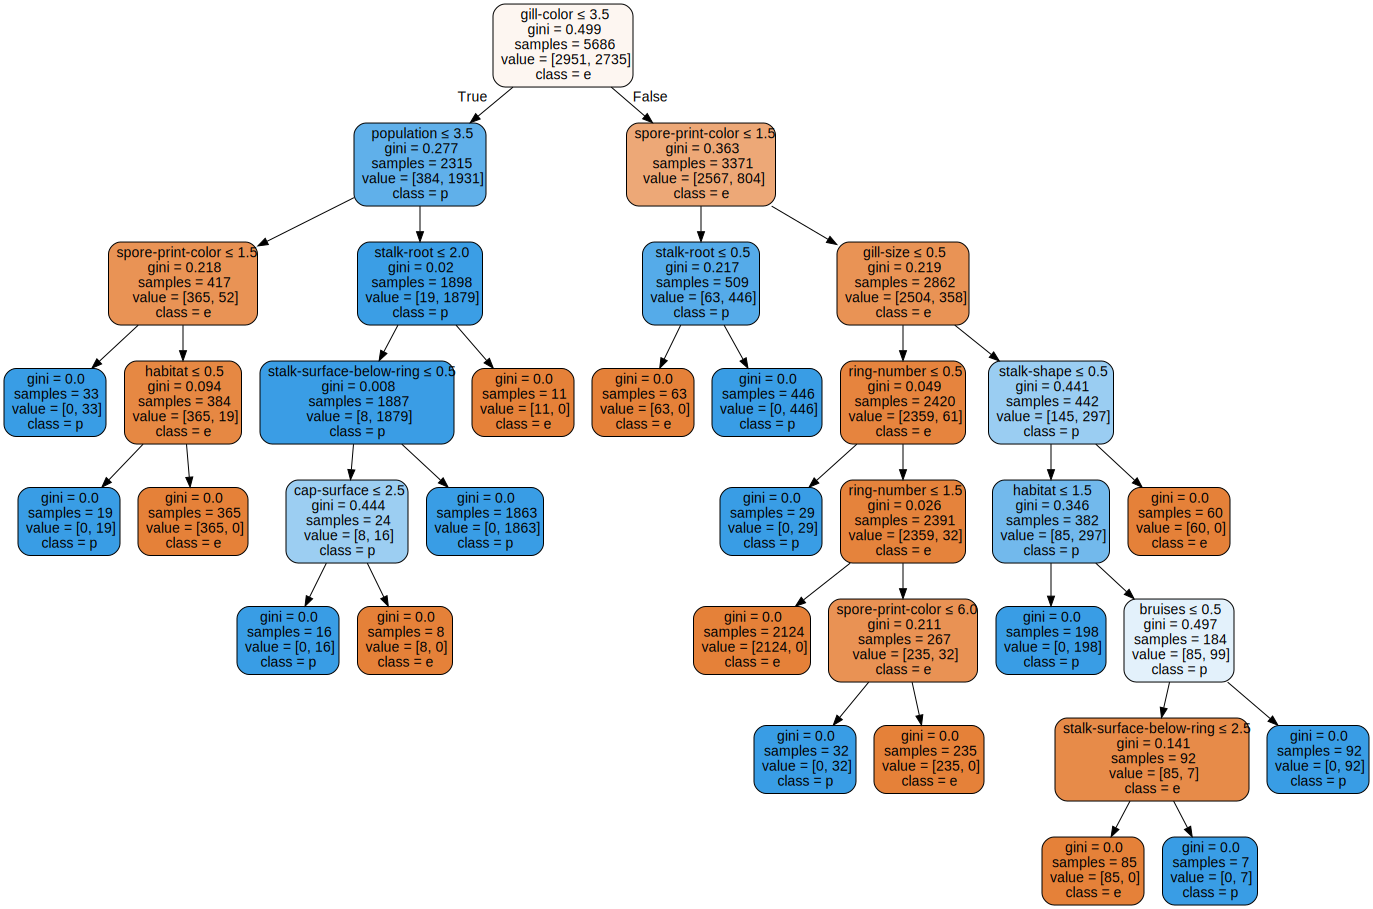

In [ ]:
dot_data = export_graphviz(best_tree, out_file=None, feature_names= FEATURES,
                                class_names=['e', 'p'],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Accuracy on test set: 1.0


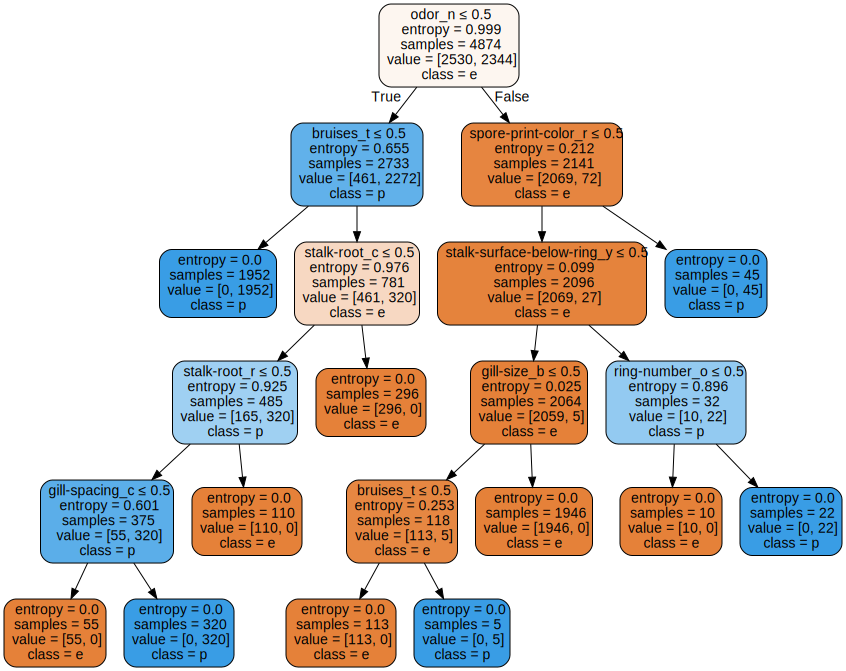

In [ ]:
depth5_tree=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
depth5_tree.fit(x_train, y_train)
print('Accuracy on test set:', depth5_tree.score(x_test, y_test))
dot_data = export_graphviz(depth5_tree, out_file=None, feature_names= FEATURES,
                                class_names=['e', 'p'],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Feature importance

In [ ]:
from matplotlib import pyplot as plt
f_imp=depth5_tree.feature_importances_
print(f_imp)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21700072 0.         0.
 0.         0.         0.         0.53917305 0.         0.
 0.         0.         0.         0.04632243 0.         0.00426981
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.06447146
 0.         0.0458205  0.         0.         0.         0.
 0.         0.         0.         0.02647361 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00588908 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0505

In [ ]:
# used and unused features in the above best decision tree
used_f=[i for i in range(len(FEATURES)) if f_imp[i]!=0]
print(used_f)
unused_f=[i for i in range(len(FEATURES)) if f_imp[i]==0]
print(unused_f)

[21, 27, 33, 35, 53, 55, 63, 87, 99]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]


[('cap-shape_b', 0.0), ('cap-shape_c', 0.0), ('cap-shape_f', 0.0), ('cap-shape_k', 0.0), ('cap-shape_s', 0.0), ('cap-shape_x', 0.0), ('cap-surface_f', 0.0), ('cap-surface_g', 0.0), ('cap-surface_s', 0.0), ('cap-surface_y', 0.0), ('cap-color_b', 0.0), ('cap-color_c', 0.0), ('cap-color_e', 0.0), ('cap-color_g', 0.0), ('cap-color_n', 0.0), ('cap-color_p', 0.0), ('cap-color_r', 0.0), ('cap-color_u', 0.0), ('cap-color_w', 0.0), ('cap-color_y', 0.0), ('bruises_f', 0.0), ('odor_a', 0.0), ('odor_c', 0.0), ('odor_f', 0.0), ('odor_l', 0.0), ('odor_m', 0.0), ('odor_p', 0.0), ('odor_s', 0.0), ('odor_y', 0.0), ('gill-attachment_a', 0.0), ('gill-attachment_f', 0.0), ('gill-spacing_w', 0.0), ('gill-size_n', 0.0), ('gill-color_b', 0.0), ('gill-color_e', 0.0), ('gill-color_g', 0.0), ('gill-color_h', 0.0), ('gill-color_k', 0.0), ('gill-color_n', 0.0), ('gill-color_o', 0.0), ('gill-color_p', 0.0), ('gill-color_r', 0.0), ('gill-color_u', 0.0), ('gill-color_w', 0.0), ('gill-color_y', 0.0), ('stalk-shape_e'

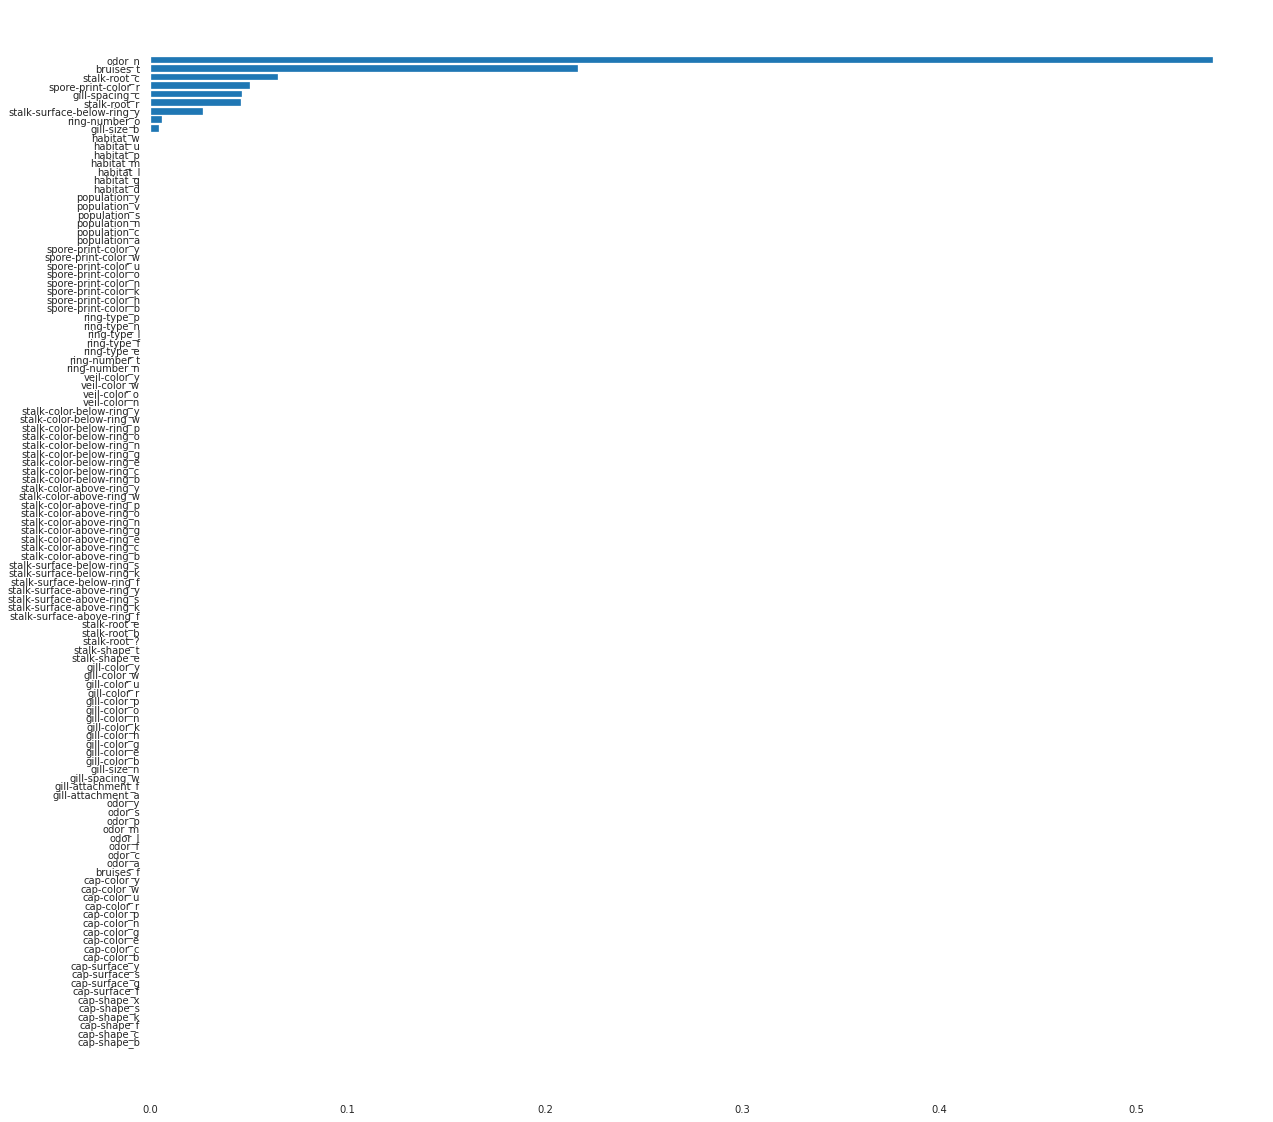

In [ ]:
# Plot feature importances
f_imp=[(f, f_imp[i]) for i, f in enumerate(FEATURES)]
f_imp.sort(key=lambda x: x[1])
f_names=[x[0] for x in f_imp]
f_score=[x[1] for x in f_imp]
print(f_imp)
plt.subplots(figsize=(20,20))
plt.barh(np.arange(len(f_score)), f_score, tick_label=f_names)
plt.show()

## Try to retrain the classifier with the same hyper parameters and used features only  
This process should output the exactly same results as best tree founed by gridsearchCV above

In [ ]:
x_train_subset=x_train[:, used_f]
x_test_subset=x_test[:, used_f]
clf=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5)
clf.fit(x_train_subset, y_train)
clf.score(x_test_subset, y_test)

1.0

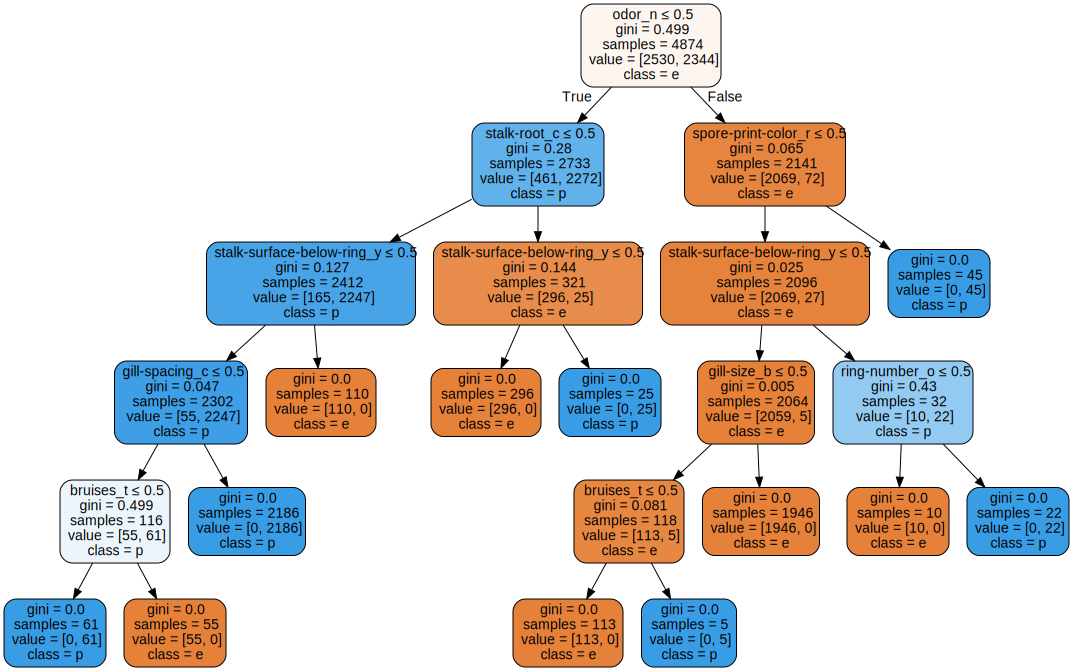

In [ ]:
dot_data = export_graphviz(clf, out_file=None, feature_names= np.array(FEATURES)[used_f],
                                class_names=['e', 'p'],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Note: Decision graph visualized for this tree is exactly the same as best tree above

## Try to retrain the classifier with unused features
This process may output bad results

In [ ]:
x_train_subset=x_train[:, unused_f]
x_test_subset=x_test[:, unused_f]
clf=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=3)
clf.fit(x_train_subset, y_train)
clf.score(x_test_subset, y_test)

0.9867692307692307

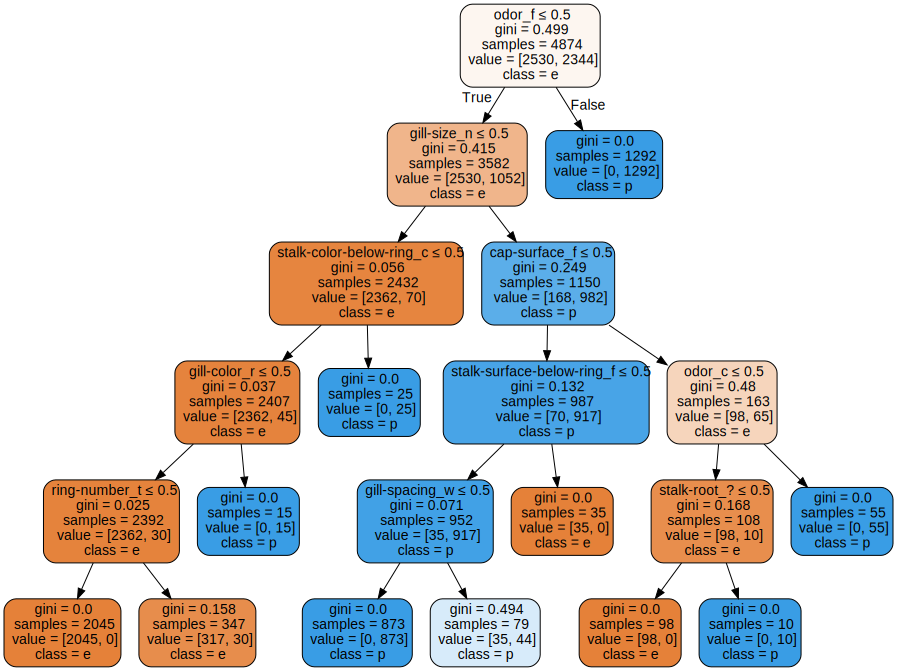

In [ ]:
dot_data = export_graphviz(clf, out_file=None, feature_names= np.array(FEATURES)[unused_f],
                                class_names=['e', 'p'],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Note: the accuracy on test set is 98.67%, which is not very bad.. This classification task seems to be quite easy since each features are discriminative between the two classes. This also shows that there are many way to contruct a decision tree base on features selection